In [1]:
import matplotlib as plt
import pandas as pd
from openai import OpenAI
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay)

In [2]:
client = OpenAI()

In [3]:
df = pd.read_csv("sample_data/test_isear_it.csv", delimiter="|")

# 0 gioia
# 1 tristezza
# 2 rabbia
# 3 paura
# 4 vergogna
# 5 disgusto
# 6 colpevolezza
sentiments = ["gioia", "tristezza", "rabbia", "paura", "vergogna", "disgusto", "colpevolezza", "idk"]

In [10]:
def gpt_chat(user_input : str):
    completion = client.chat.completions.create(
        model="ft:gpt-3.5-turbo-0125:personal:emotions:9MFmXPJ9",
        messages=[
            {"role": "system", "content": "Sei un chatbot che riconosce quale emozione tra 'gioia', 'vergogna', 'colpevolezza', 'paura', " \
                        "'rabbia', 'tristezza' esprime la frase che gli viene posta. Se non conosci la risposta rispondi " \
                        "con 'idk'."},
            {"role": "user", "content": user_input}
        ]
    )
    return completion.choices[0].message.content

In [ ]:
y_pred = list()
matches = 0
for index, example in df.iterrows():
    print(f"Example {index + 1}/{len(df)}")
    print("User:", example["text"])
    answer = gpt_chat(example["text"])
    print(f"Predicted sentiment: {answer}")
    print(f"True sentiment: {sentiments[example['label']]}")
    y_pred.append(answer)
    if answer == sentiments[example['label']]:
        matches += 1
    print(f"Matches: {matches}/{len(df)}")
    print()

In [24]:
y_pred = [ s if s in sentiments else "idk" for s in y_pred]

In [25]:
y_true = [sentiments[s] for s in df["label"]]
accuracy = accuracy_score(y_true=y_true, y_pred=y_pred)
print(f"Accuracy score: {accuracy}")

Accuracy score: 0.75


In [26]:
class_report = classification_report(y_true=y_true, y_pred=y_pred)
print(class_report)

              precision    recall  f1-score   support

colpevolezza       0.71      0.69      0.70       157
    disgusto       0.72      0.68      0.70       160
       gioia       0.95      0.95      0.95       164
         idk       0.00      0.00      0.00         0
       paura       0.82      0.88      0.85       162
      rabbia       0.69      0.69      0.69       162
   tristezza       0.71      0.75      0.73       162
    vergogna       0.65      0.61      0.63       161

    accuracy                           0.75      1128
   macro avg       0.66      0.66      0.66      1128
weighted avg       0.75      0.75      0.75      1128



/home/luca/ChatGPT4Emotions/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/luca/ChatGPT4Emotions/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/luca/ChatGPT4Emotions/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


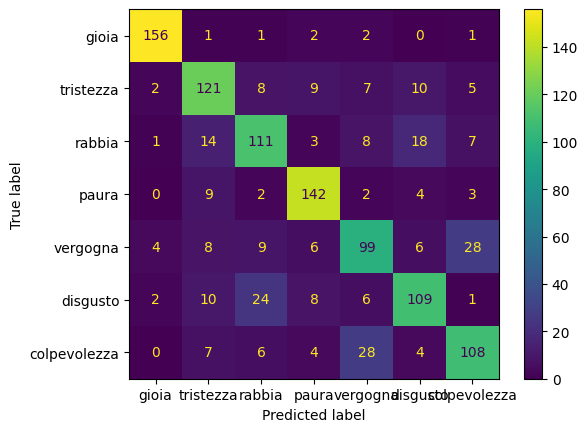

In [33]:
conf_matrix = confusion_matrix(y_true=y_true, y_pred=y_pred, labels=sentiments)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=sentiments)
disp.plot()